In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

In [152]:
def createHeatmap(file, title: str, names: list):
    df = pd.read_csv(file, sep='\t')
    rowInd = df.iloc[:,0]
    df = df.iloc[:,5:]

    df = df.sort_values('cluster')
    df.reset_index(inplace=True)
    df.drop(df.columns[0],axis=1, inplace=True)

    clusterlines = [0]
    for i in range(3):
        inDf = df[df['cluster']==i]
        clusterlines.append(inDf.index[-1])
    
    midpts = []
    for i in range(1,len(clusterlines)):
        midpt = (clusterlines[i] + clusterlines[i-1]) // 2
        midpts.append(midpt)
    
    clusterlines = clusterlines[1:]

    labels = [f'cluster {i}' for i in range(1,len((df['cluster']).unique()) + 1)]
    #print(labels)

    #print(clusterlines)
    #display(df)
    #df.columns = names
    #display(df.iloc[:, 0])

    # HEAT MAP

    plt.figure(figsize= (1080,1080))
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4)
    axes = (ax1, ax2, ax3, ax4)

    newdf = pd.DataFrame(df.iloc[:,0], index=rowInd)
    h1 = sns.heatmap(newdf, cmap='plasma',ax=ax1, cbar=False)
    h1.set_yticks(midpts)
    h1.set_yticklabels(labels)
    h1.set_ylabel('')

    newdf = pd.DataFrame(df.iloc[:,1], index=rowInd)
    h2 = sns.heatmap(newdf, cmap='plasma', ax=ax2, cbar=False)
    h2.set_yticks([])
    h2.set_ylabel('')

    newdf = pd.DataFrame(df.iloc[:,2], index=rowInd)
    h3 = sns.heatmap(newdf, cmap='plasma', ax=ax3, cbar=False)
    h3.set_yticks([])
    h3.set_ylabel('')

    newdf = pd.DataFrame(df.iloc[:,3], index=rowInd)
    h4 = sns.heatmap(newdf, cmap='plasma', ax=ax4, cbar=True, cbar_kws={'label': 'Normalized Mean TMM value'})
    h4.set_yticks([])
    h4.set_ylabel('')

    for ax in axes:
        ax.hlines(clusterlines, *ax.get_xlim(), color='white')
    
    

    # CLUSTER MAP
    # lut = dict(zip((df['cluster']).unique(), 'rgb'))
    # row_clrs = (df['cluster']).map(lut)

    # cmap = sns.clustermap(df.iloc[:, :], col_cluster=False, row_cluster=True, row_colors=row_clrs)
    # cmap.ax_heatmap.set_yticks([])

    plt.tight_layout()
    #plt.savefig('test.pdf', format='pdf', dpi=1080)

    plt.show()


<Figure size 108000x108000 with 0 Axes>

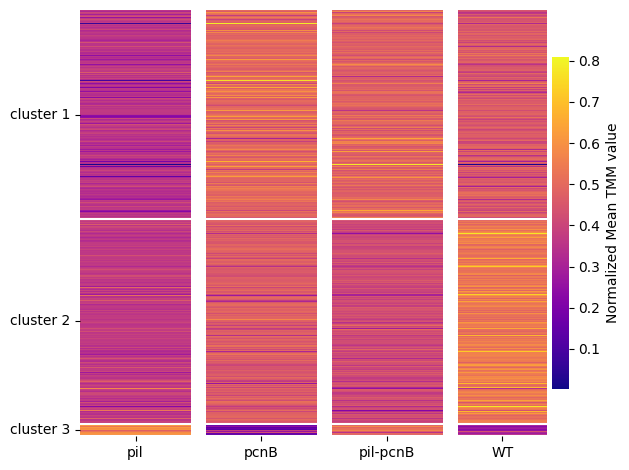

In [154]:
names = ['pil', 'pcnB', 'pil-pcnB', 'WT']
createHeatmap('test.tsv', 'test', names)